In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [18]:
df =pd.read_csv(r"data.csv")


In [19]:
df.head(3)


,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147


# Data Cleaning

In [22]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group", "DateHour", "Users", "Sessions", "Engaged Sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]


In [6]:
df.head()


,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [24]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')


In [25]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour


In [26]:
df.head()


,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

# ✅ Q1. What are the overall trends in website sessions and users over time?
## 🎯 Objective:Analyze how sessions and users change over time to identify peak days/hours and general traffic patterns.

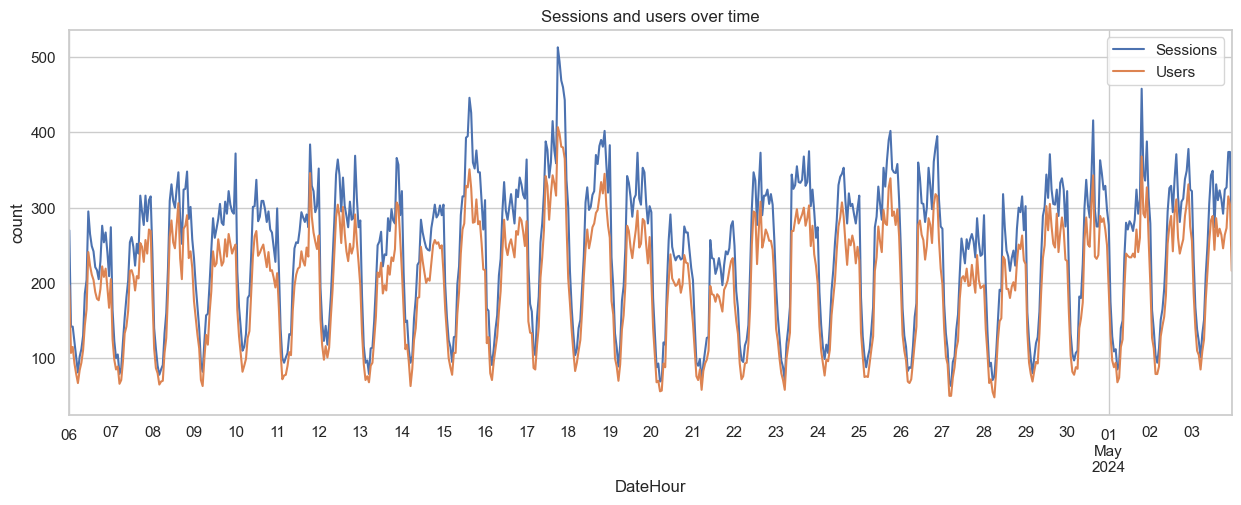

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()


# ✅ Q2. Which marketing channel brings the highest number of users to the website?

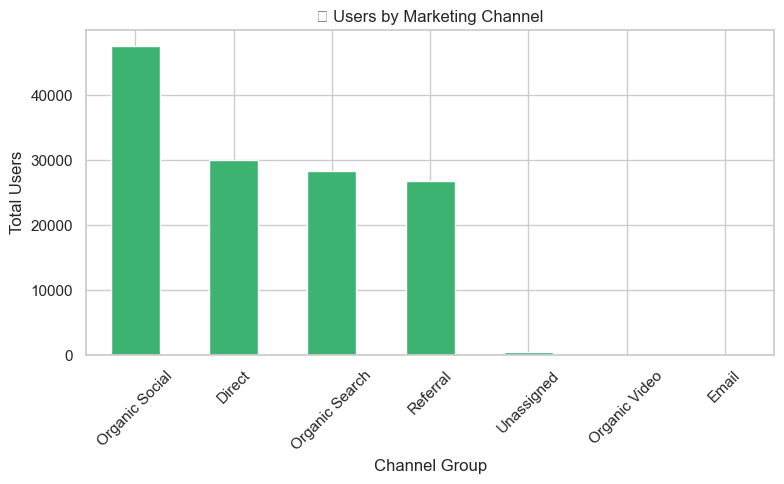

In [29]:
# Total users per channel
top_channels = df.groupby('channel group')['Users'].sum().sort_values(ascending=False)

# Plot
top_channels.plot(kind='bar', color='mediumseagreen', figsize=(8, 5))
plt.title('📊 Users by Marketing Channel')
plt.ylabel('Total Users')
plt.xlabel('Channel Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ✅ Q3. Which traffic channels show the highest average engagement time per session, and what does this imply about user behavior?

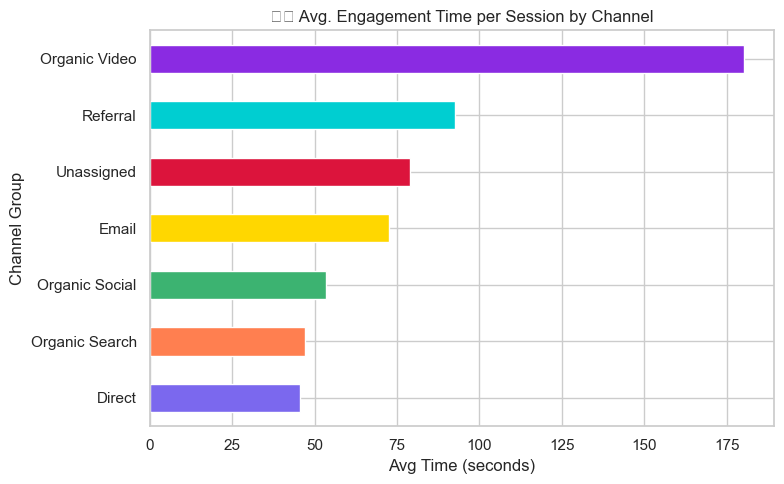

In [39]:
# Average engagement time by channel
import matplotlib.pyplot as plt
engagement_time = df.groupby('channel group')['Average engagement time per session'].mean().sort_values()
# Custom colors — jitne channel groups hain utne colors chahiye
colors = ['#7B68EE', '#FF7F50', '#3CB371', '#FFD700', '#DC143C', '#00CED1', '#8A2BE2']  
# You can expand this list as needed

# Plot
engagement_time.plot(
    kind='barh', 
    color=colors[:len(engagement_time)],  # Ensure color count matches bar count
    figsize=(8, 5)
)

plt.title('⏱️ Avg. Engagement Time per Session by Channel')
plt.xlabel('Avg Time (seconds)')
plt.ylabel('Channel Group')
plt.tight_layout()
plt.show()


# ✅ Q4. How does the engagement rate vary across different marketing channels?

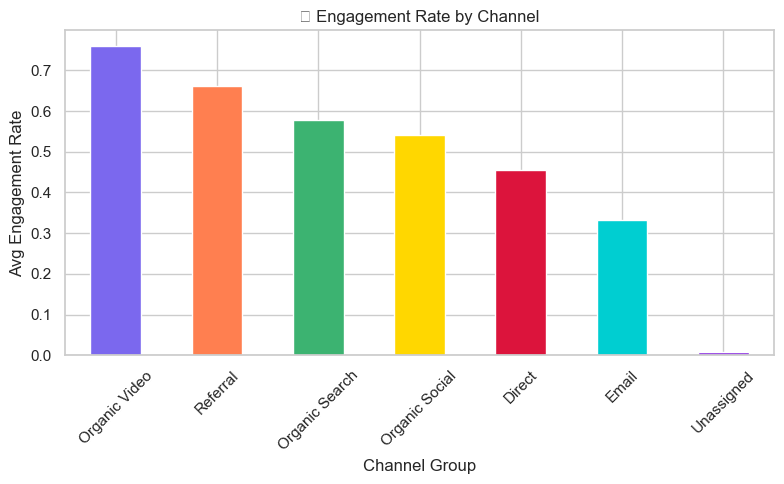

In [38]:
# Average engagement rate by channel
engagement_rate = df.groupby('channel group')['Engagement rate'].mean().sort_values(ascending=False)

colors = ['#7B68EE', '#FF7F50', '#3CB371', '#FFD700', '#DC143C', '#00CED1', '#8A2BE2']  
# Plot
engagement_rate.plot(kind='bar', color=colors, figsize=(8, 5))
plt.title('📈 Engagement Rate by Channel')
plt.ylabel('Avg Engagement Rate')
plt.xlabel('Channel Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ✅ Q5. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

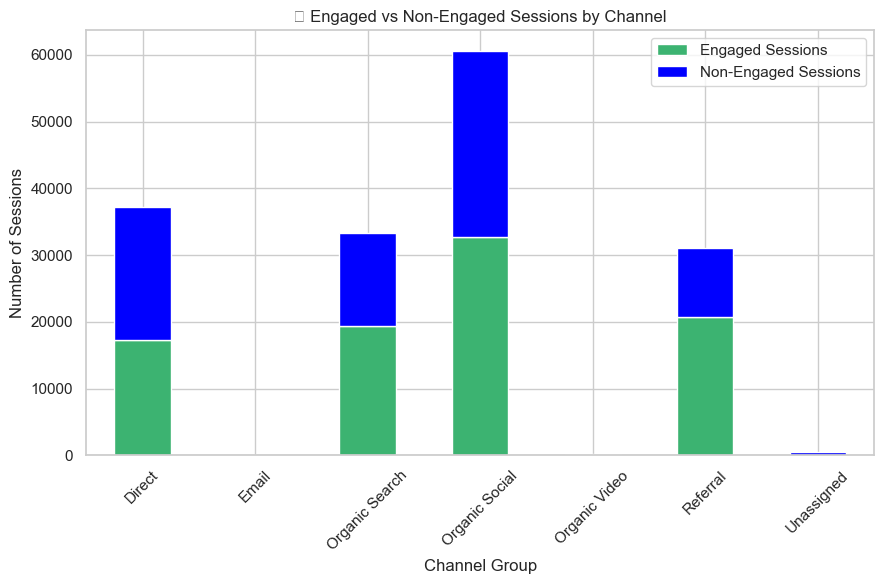

In [43]:
# Grouped data
grouped = df.groupby('channel group')[['Sessions', 'Engaged Sessions']].sum()

# Calculate non-engaged sessions
grouped['Non-Engaged Sessions'] = grouped['Sessions'] - grouped['Engaged Sessions']

# Plot: Stacked bar chart
grouped[['Engaged Sessions', 'Non-Engaged Sessions']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(9, 6), 
    color=['mediumseagreen', 'blue']
)

plt.title('🟢 Engaged vs Non-Engaged Sessions by Channel')
plt.ylabel('Number of Sessions')
plt.xlabel('Channel Group')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# ✅ Q6. At what hours of the day does each channel drive the most traffic?

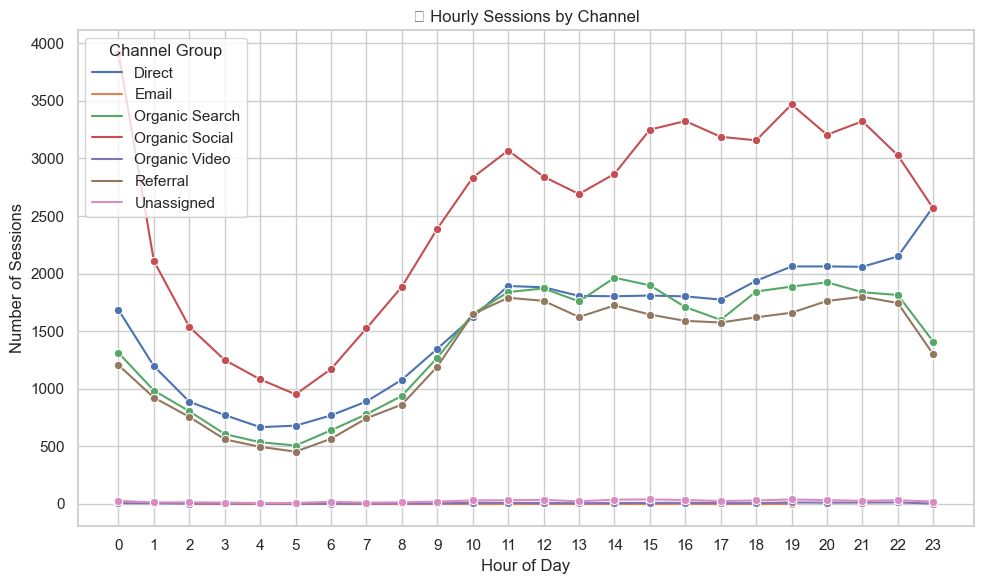

In [44]:
# Group sessions by channel and hour
channel_hour = df.groupby(['channel group', 'Hour'])['Sessions'].sum().reset_index()

# Plot: Lineplot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=channel_hour, x='Hour', y='Sessions', hue='channel group', marker='o')

plt.title('⏰ Hourly Sessions by Channel')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sessions')
plt.xticks(range(0, 24))
plt.legend(title='Channel Group')
plt.tight_layout()
plt.show()


# ✅ Q7. Is there any correlation between high traffic (sessions) and high engagement rate over time?

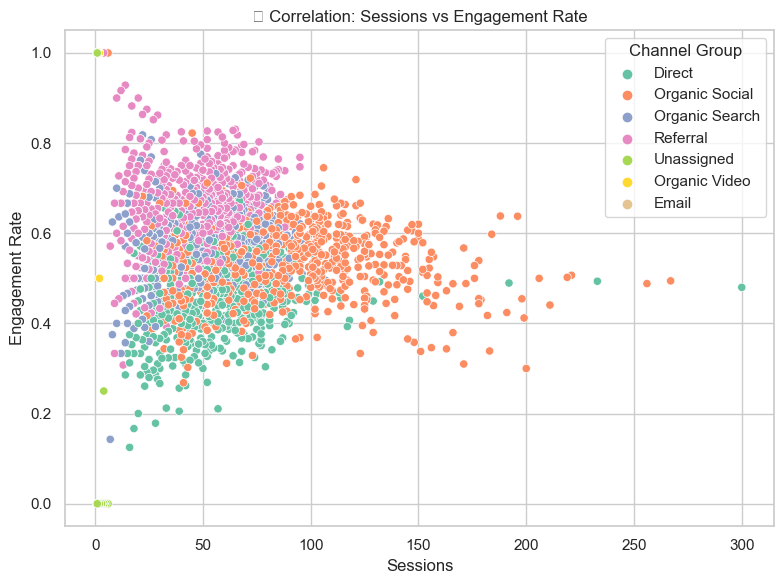

In [45]:
# Scatter plot to visualize correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sessions', y='Engagement rate', hue='channel group', palette='Set2')

plt.title('🔗 Correlation: Sessions vs Engagement Rate')
plt.xlabel('Sessions')
plt.ylabel('Engagement Rate')
plt.legend(title='Channel Group')
plt.tight_layout()
plt.show()


In [46]:
# Correlation value
correlation = df['Sessions'].corr(df['Engagement rate'])
print(f"🔢 Correlation between Sessions and Engagement Rate: {correlation:.2f}")


🔢 Correlation between Sessions and Engagement Rate: 0.30


# ✅ Q8. Are there noticeable patterns in user traffic and engagement during specific hours of the day?

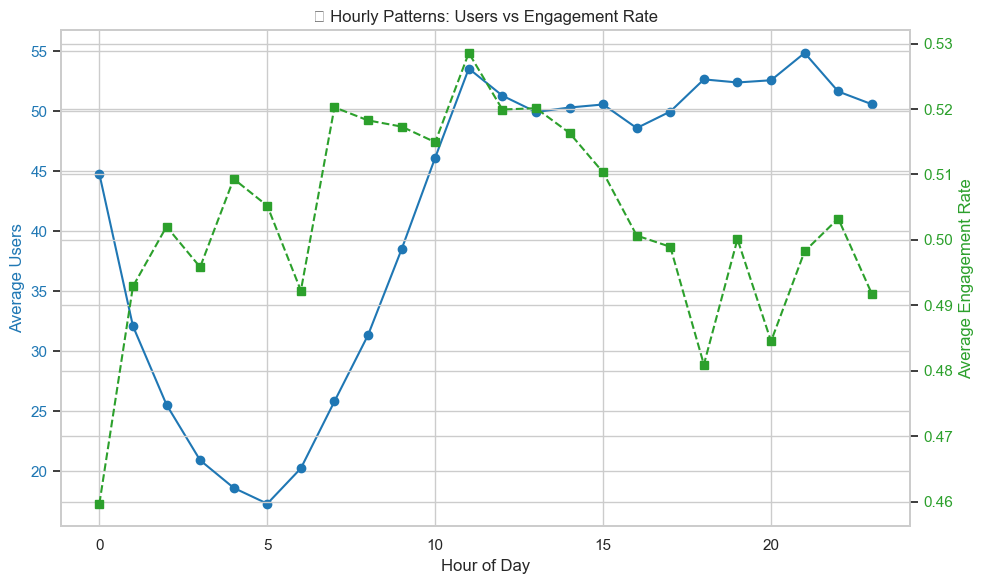

In [47]:
# Group by Hour
hourly = df.groupby('Hour')[['Users', 'Engagement rate']].mean().reset_index()

# Plot using dual axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Users
color = 'tab:blue'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Users', color=color)
ax1.plot(hourly['Hour'], hourly['Users'], color=color, marker='o', label='Users')
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Engagement Rate', color=color)
ax2.plot(hourly['Hour'], hourly['Engagement rate'], color=color, marker='s', linestyle='--', label='Engagement Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('🕒 Hourly Patterns: Users vs Engagement Rate')
fig.tight_layout()
plt.show()


# ✅ Q9. Which channels generate more actions/events per session, and how can this inform content or campaign strategy?

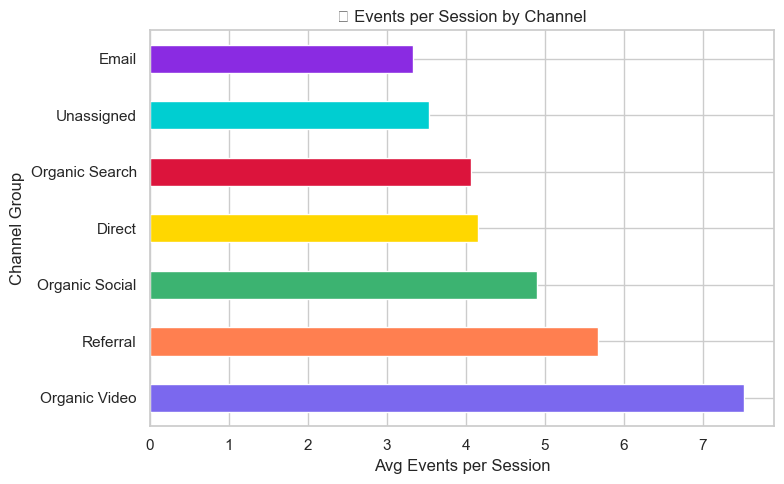

In [49]:
# Average events per session by channel
events_per_session = df.groupby('channel group')['Events per session'].mean().sort_values(ascending=False)
colors = ['#7B68EE', '#FF7F50', '#3CB371', '#FFD700', '#DC143C', '#00CED1', '#8A2BE2']  
# Plot
events_per_session.plot(kind='barh', color=colors, figsize=(8, 5))
plt.title('🎯 Events per Session by Channel')
plt.xlabel('Avg Events per Session')
plt.ylabel('Channel Group')
plt.tight_layout()
plt.show()


# ✅ Q10. Which traffic sources are consistently underperforming in terms of engagement, and what strategies can improve them?

In [50]:
# Calculate average metrics by channel
channel_metrics = df.groupby('channel group')[['Engagement rate', 'Average engagement time per session', 'Events per session']].mean()

# Sort by Engagement Rate (ascending)
underperforming = channel_metrics.sort_values(by='Engagement rate').head()

# Display the worst 5 performing channels
print("⚠️ Underperforming Traffic Channels:\n")
print(underperforming.round(2))


⚠️ Underperforming Traffic Channels:

                Engagement rate  Average engagement time per session  \
channel group                                                          
Unassigned                 0.01                                78.96   
Email                      0.33                                72.67   
Direct                     0.46                                45.53   
Organic Social             0.54                                53.49   
Organic Search             0.58                                47.01   

                Events per session  
channel group                       
Unassigned                    3.53  
Email                         3.33  
Direct                        4.15  
Organic Social                4.91  
Organic Search                4.07  


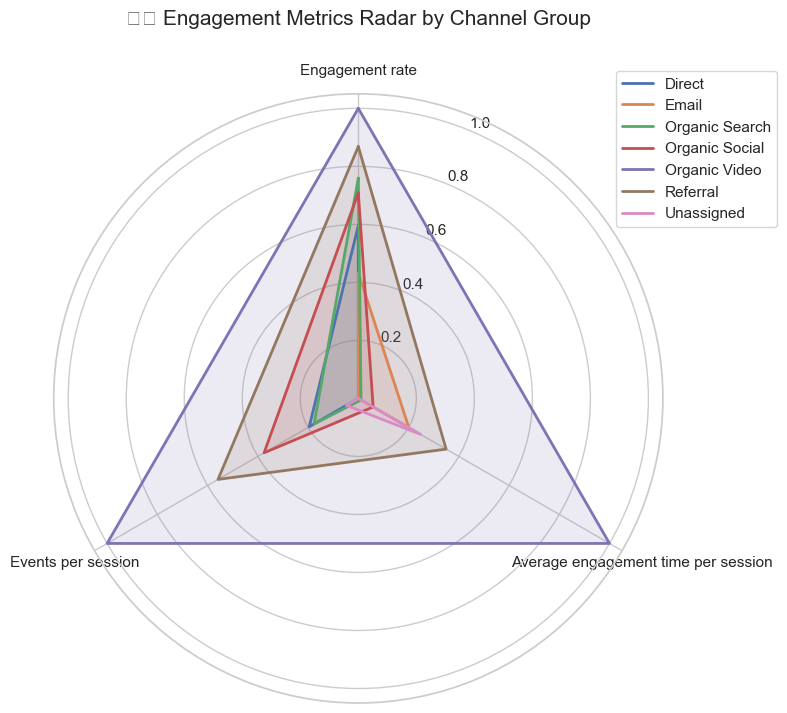

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Group and select key metrics
metrics = ['Engagement rate', 'Average engagement time per session', 'Events per session']
channel_data = df.groupby('channel group')[metrics].mean()

# Step 2: Normalize metrics (0-1 scale)
scaler = MinMaxScaler()
normalized = pd.DataFrame(scaler.fit_transform(channel_data), 
                          columns=metrics, 
                          index=channel_data.index)

# Step 3: Radar chart setup
labels = metrics
num_vars = len(labels)

# Function to plot each channel
def plot_radar(df, title):
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    labels_rot = labels + [labels[0]]

    # Add first column to the end for looped plot
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for index, row in df.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=index, linewidth=2)
        ax.fill(angles, values, alpha=0.15)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title, size=15, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
    plt.tight_layout()
    plt.show()

# Step 4: Call the plot function
plot_radar(normalized, '🕸️ Engagement Metrics Radar by Channel Group')
